In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
## 한글폰트
!apt-get update -qq
!apt-get install -qq fonts-nanum

# matplotlib에서 한글 폰트를 사용하도록 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 폰트 경로
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 추가
fm.fontManager.addfont(font_path)

# 한글 폰트를 기본 폰트로 설정
plt.rcParams['font.family'] = 'NanumGothic'

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


#1.데이터 불러오기

In [3]:
data_path = '/content/drive/MyDrive/kaggle'
df_earned = pd.read_excel(data_path + '/df_earned_23.xlsx')
df_closed = pd.read_excel(data_path + '/df_closed_23.xlsx')

In [4]:
df_sum = pd.merge(df_earned, df_closed, how = 'inner')

In [ ]:
df_sum['서비스_업종_코드_명'].unique()

array(['식당', '필수의료', '소매(의료)', '소매(미용)', '소매(의류)', '숙박업', '전자제품 관련 서비스',
       '소매(식품)', '소매(가구)', '교육/학원', '소매(서적/문구)', '미용', '소매(안경)',
       '소매(전자제품)', '스포츠/여가', '차량 관련 서비스', '소매(스포츠)', '주점', '카페 및 베이커리',
       '소매(생활)', '소매(운송)', '반려동물', '부동산'], dtype=object)

In [ ]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29230 entries, 0 to 29229
Data columns (total 60 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        29230 non-null  int64  
 1   자치구_코드           29230 non-null  int64  
 2   자치구_코드_명         29230 non-null  object 
 3   서비스_업종_코드        29230 non-null  object 
 4   서비스_업종_코드_명      29230 non-null  object 
 5   당월_매출_금액         29230 non-null  int64  
 6   당월_매출_건수         29230 non-null  int64  
 7   주중_매출_금액         29230 non-null  int64  
 8   주말_매출_금액         29230 non-null  int64  
 9   월요일_매출_금액        29230 non-null  int64  
 10  화요일_매출_금액        29230 non-null  int64  
 11  수요일_매출_금액        29230 non-null  int64  
 12  목요일_매출_금액        29230 non-null  int64  
 13  금요일_매출_금액        29230 non-null  int64  
 14  토요일_매출_금액        29230 non-null  int64  
 15  일요일_매출_금액        29230 non-null  int64  
 16  시간대_00~06_매출_금액  29230 non-null  int64  
 17  시간대_06~11_매출

In [5]:
df_restaurant = df_sum[df_sum['서비스_업종_코드_명'] == '식당']
df_food = df_sum[df_sum['서비스_업종_코드_명'] == '소매(식품)']
df_sport_leisure = df_sum[df_sum['서비스_업종_코드_명'] == '스포츠/여가']
df_edu = df_sum[df_sum['서비스_업종_코드_명'] == '교육/학원']
df_elec = df_sum[df_sum['서비스_업종_코드_명'] == '소매(전자제품)']
df_hospital = df_sum[df_sum['서비스_업종_코드_명'] == '필수의료']
df_beauty = df_sum[df_sum['서비스_업종_코드_명'] == '미용']
df_cloth = df_sum[df_sum['서비스_업종_코드_명'] == '소매(의류)']
df_store = df_sum[df_sum['서비스_업종_코드_명'] == '소매(서적/문구)']
df_medical = df_sum[df_sum['서비스_업종_코드_명'] == '소매(의료)']
df_cafe = df_sum[df_sum['서비스_업종_코드_명'] == '카페 및 베이커리']
df_life = df_sum[df_sum['서비스_업종_코드_명'] == '소매(생활)']
df_car = df_sum[df_sum['서비스_업종_코드_명'] == '차량 관련 서비스']
df_furni = df_sum[df_sum['서비스_업종_코드_명'] == '소매(가구)']
df_sleep = df_sum[df_sum['서비스_업종_코드_명'] == '숙박업']
df_service = df_sum[df_sum['서비스_업종_코드_명'] == '전자제품 관련 서비스']
df_eye = df_sum[df_sum['서비스_업종_코드_명'] == '소매(안경)']
df_retail_beauty = df_sum[df_sum['서비스_업종_코드_명'] == '소매(미용)']
df_retail_sport = df_sum[df_sum['서비스_업종_코드_명'] == '소매(스포츠)']
df_bar = df_sum[df_sum['서비스_업종_코드_명'] == '주점']
df_pet = df_sum[df_sum['서비스_업종_코드_명'] == '반려동물']
df_trans = df_sum[df_sum['서비스_업종_코드_명'] == '소매(운송)']
df_property = df_sum[df_sum['서비스_업종_코드_명'] == '부동산']

#2.전체적인 시도표 확인(폐업률)

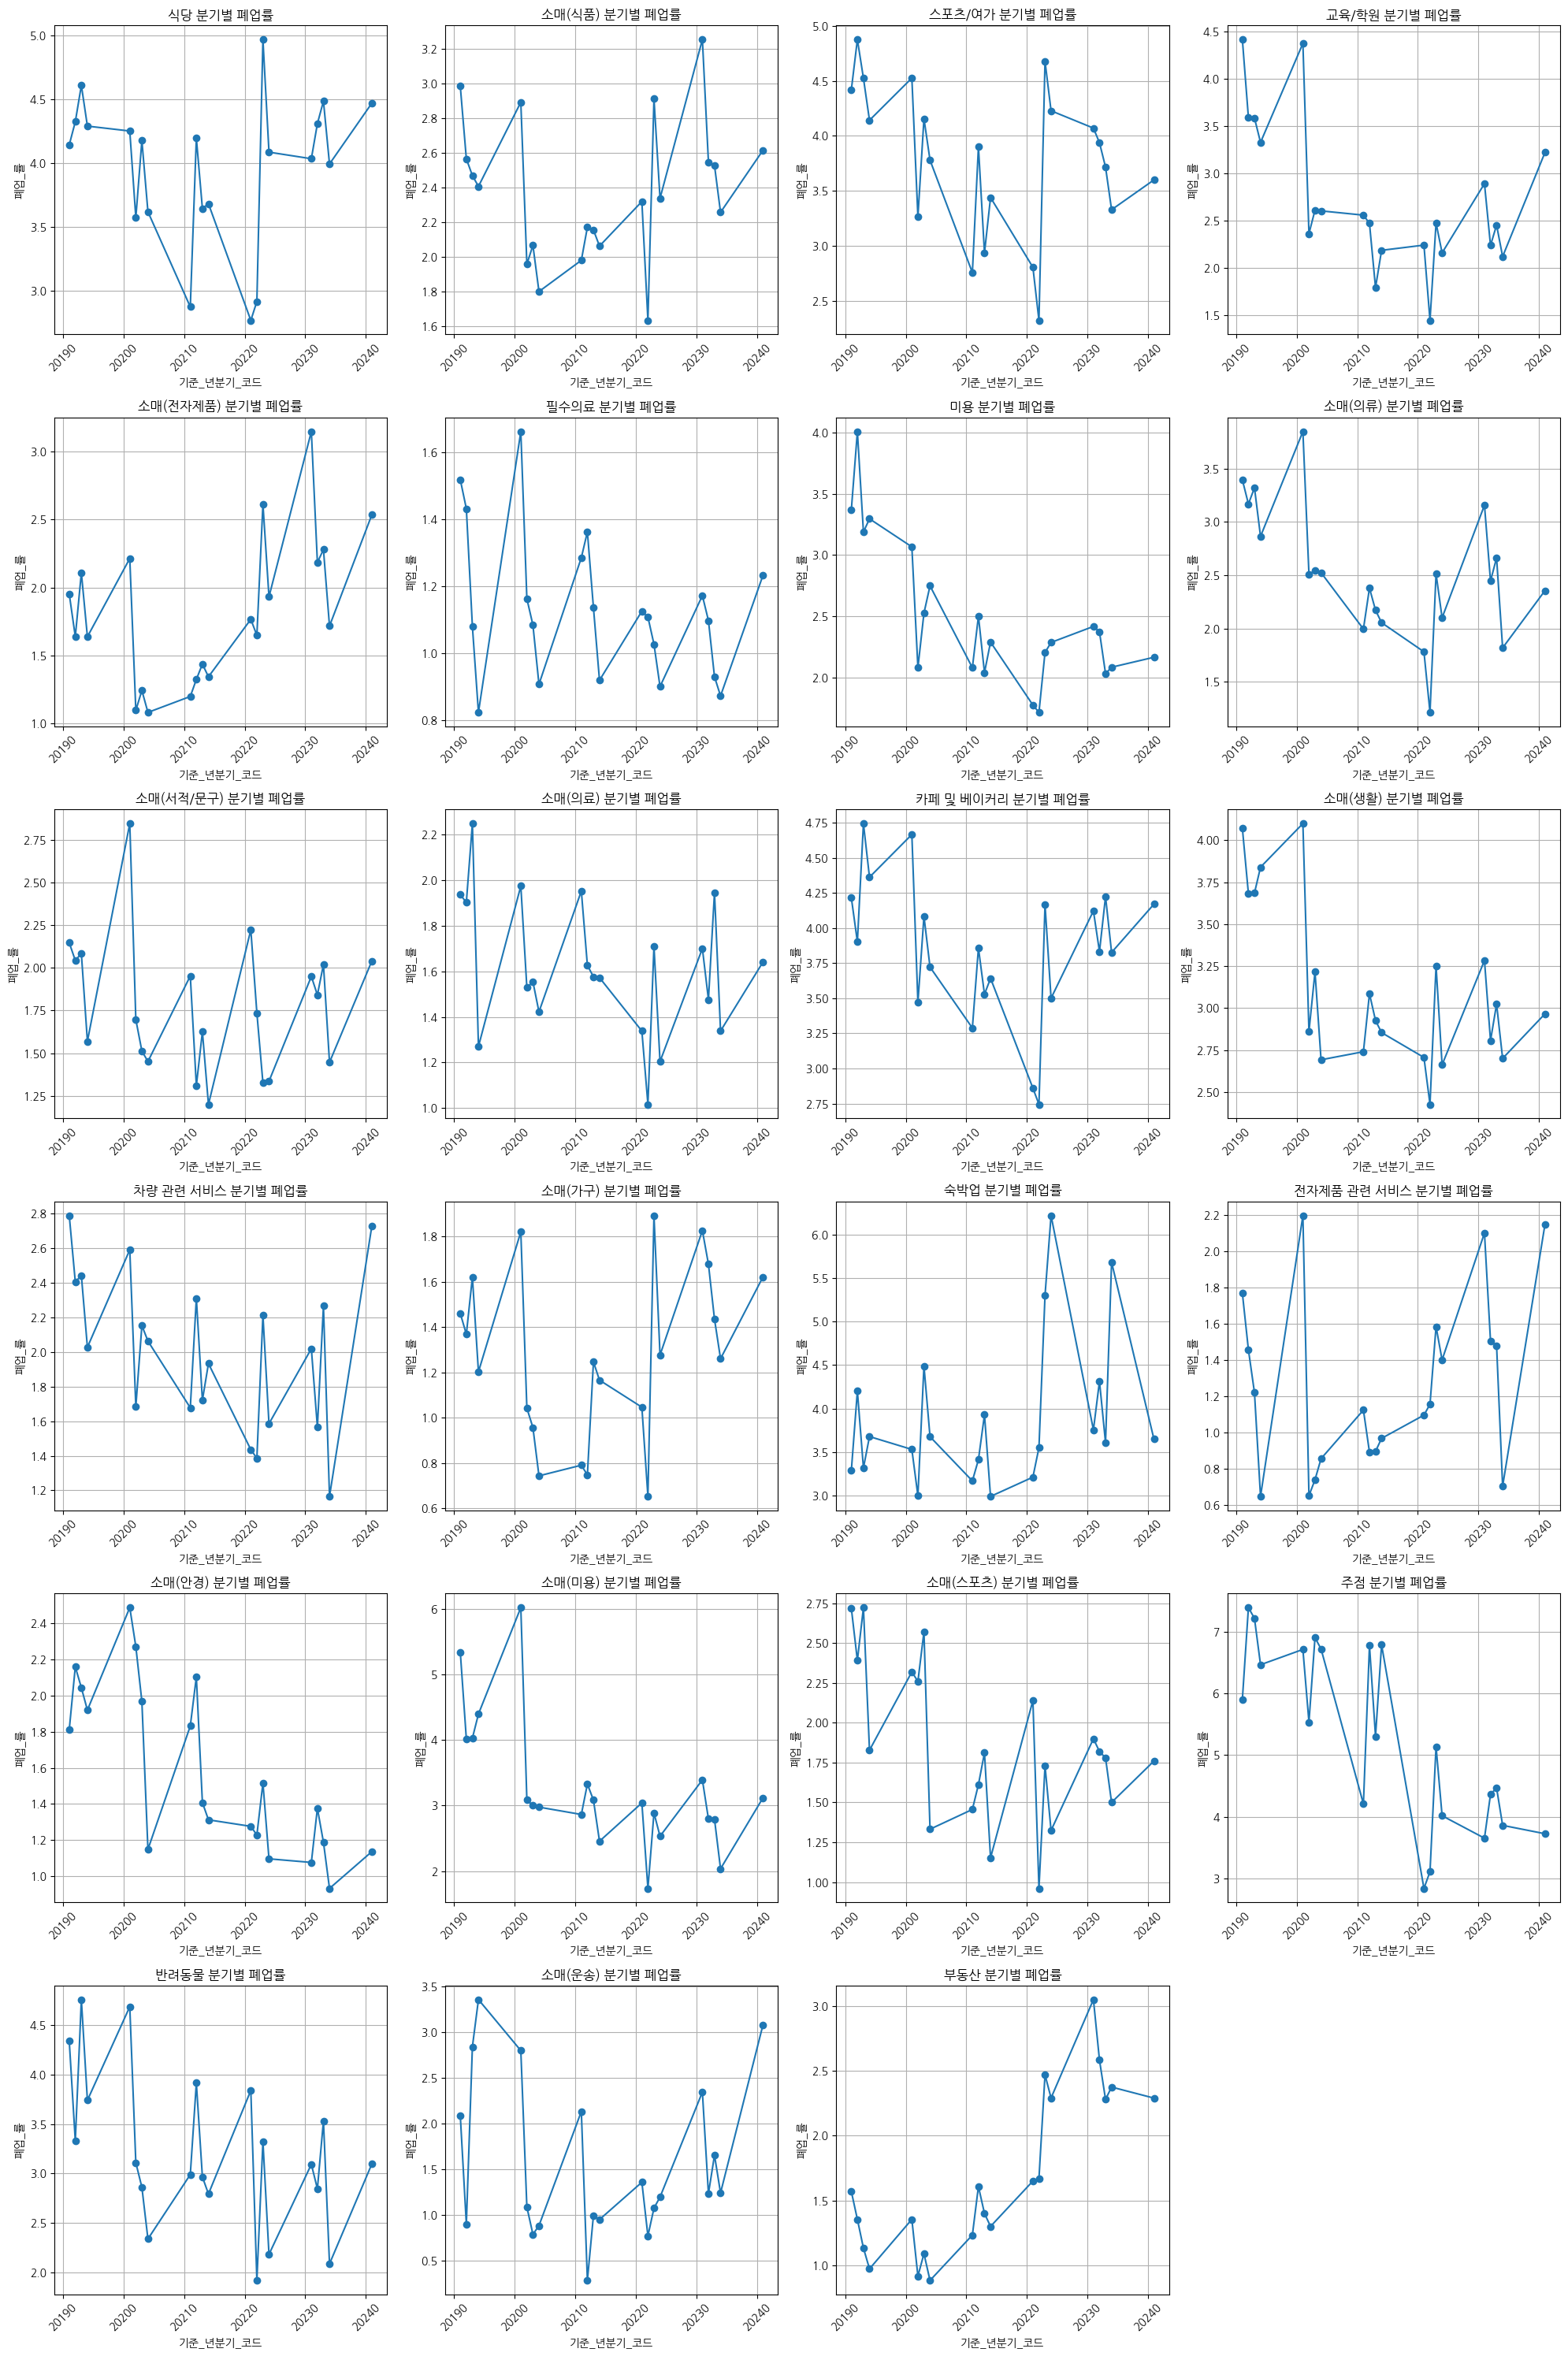

In [6]:
dfs = [
    (df_restaurant, '식당'), (df_food, '소매(식품)'), (df_sport_leisure, '스포츠/여가'),
    (df_edu, '교육/학원'), (df_elec, '소매(전자제품)'), (df_hospital, '필수의료'),
    (df_beauty, '미용'), (df_cloth, '소매(의류)'), (df_store, '소매(서적/문구)'),
    (df_medical, '소매(의료)'), (df_cafe, '카페 및 베이커리'), (df_life, '소매(생활)'),
    (df_car, '차량 관련 서비스'), (df_furni, '소매(가구)'), (df_sleep, '숙박업'),
    (df_service, '전자제품 관련 서비스'), (df_eye, '소매(안경)'), (df_retail_beauty, '소매(미용)'),
    (df_retail_sport, '소매(스포츠)'), (df_bar, '주점'), (df_pet, '반려동물'),
    (df_trans, '소매(운송)'), (df_property, '부동산')
]
# 모든 분기 범위 설정
all_quarters = pd.Series([int(f'{year}{quarter}') for year in range(2019, 2025) for quarter in range(1, 5) if not (year == 2024 and quarter > 1)])

# 결과 저장 리스트
results = []

# 각 데이터프레임에 대해 그룹별 평균 계산 및 누락된 분기 채우기
for df, name in dfs:
    p1 = df.groupby('기준_년분기_코드')['폐업_률'].mean().reindex(all_quarters, fill_value=0).reset_index()
    p1.columns = ['기준_년분기_코드', '폐업_률']
    results.append((p1, name))

# y축 범위 결정
all_closure_rates = pd.concat([result[0]['폐업_률'] for result in results])
y_min, y_max = all_closure_rates.min(), all_closure_rates.max()

# 그래프 그리기
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, (result, name) in enumerate(results):
    axes[i].plot(result['기준_년분기_코드'], result['폐업_률'], marker='o')
    axes[i].set_title(f'{name} 분기별 폐업률')
    axes[i].set_xlabel('기준_년분기_코드')
    axes[i].set_ylabel('폐업_률')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)  # X축 레이블 회전

# 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 폐업률에 관해서

## 식당 : 유독 폐업률이 높게 띈 분기가 보임
# 필수의료 : 확실한 계절성이 보인다.
# 소매(서적/문구), 소매(의료) : 약간의 계절성이 보인다.
# 소매 생활 :

# 차량 관련 서비스, 소매(운송), 부동산

#3.각 업종별 자세하게 특징 들여다보기

In [8]:
all_quarters = pd.Series([int(f'{year}{quarter}') for year in range(2019, 2025) for quarter in range(1, 5) if not (year == 2024 and quarter > 1)])

# 그룹별 평균 계산 결과 저장할 사전
grouped_results = {}

# 각 데이터프레임에 대해 그룹별 평균 계산 및 누락된 분기 채우기
for df, name in dfs:
    p1 = df.groupby('기준_년분기_코드')['폐업_률'].mean().reindex(all_quarters, fill_value=0).reset_index()
    p1.columns = ['기준_년분기_코드', '폐업_률']
    grouped_results[name] = p1

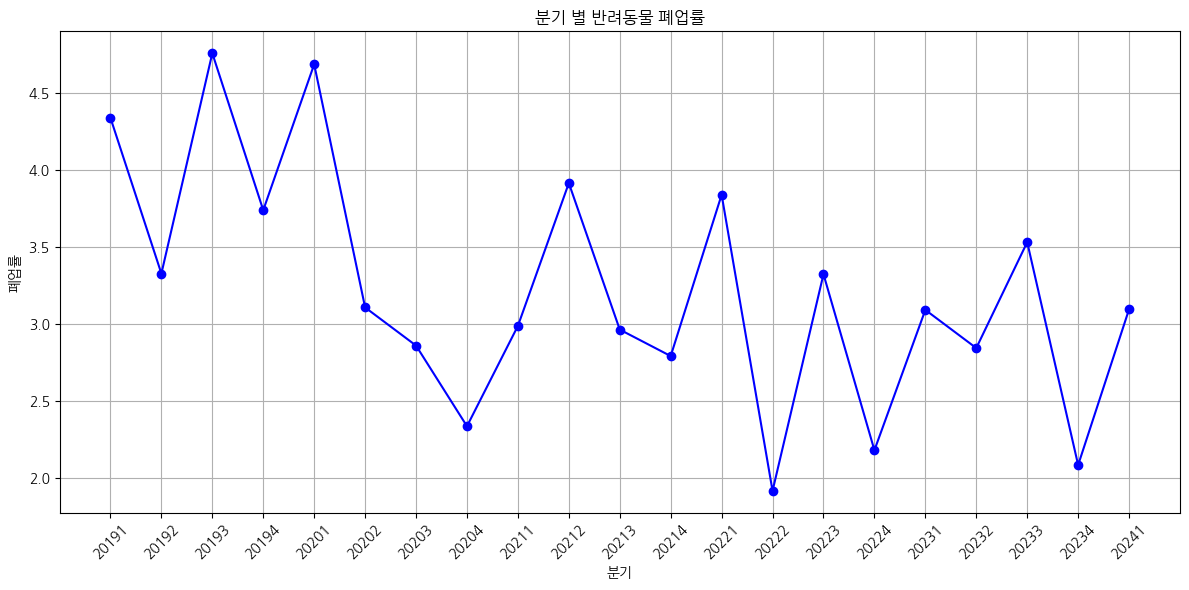

In [20]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(
grouped_results['반려동물']['기준_년분기_코드'].astype(str),
grouped_results['반려동물']['폐업_률'], marker='o', linestyle='-', color='b')
plt.title('분기 별 반려동물 폐업률')
plt.xlabel('분기')
plt.ylabel('폐업률')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()


#반려동물


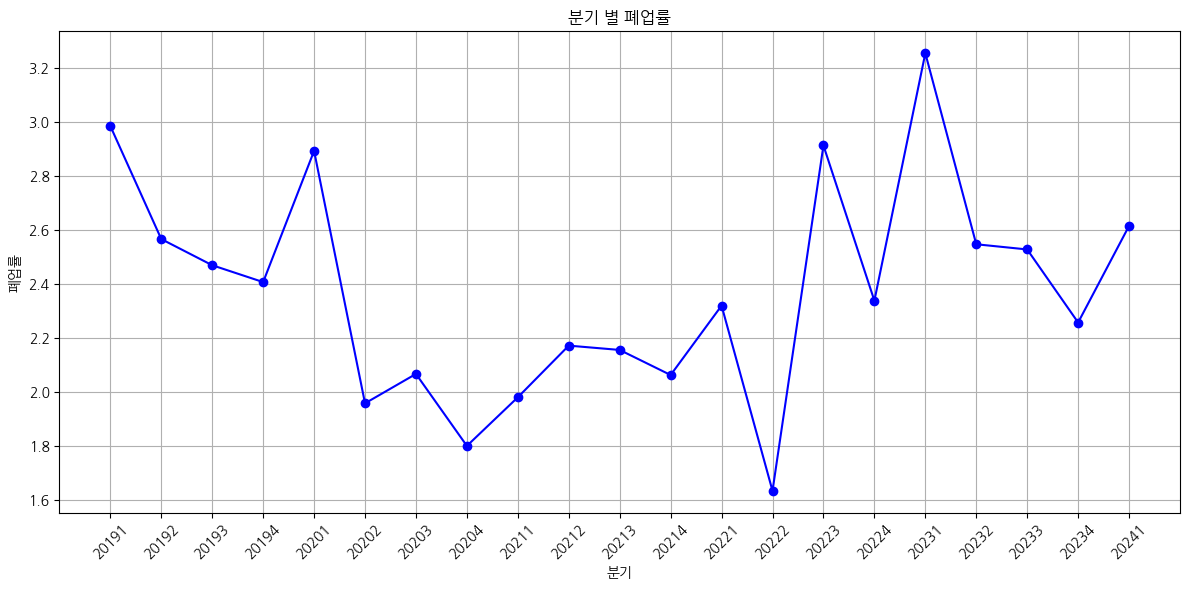

In [12]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(
grouped_results['소매(식품)']['기준_년분기_코드'].astype(str),
grouped_results['소매(식품)']['폐업_률'], marker='o', linestyle='-', color='b')
plt.title('분기 별 폐업률')
plt.xlabel('분기')
plt.ylabel('폐업률')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()


2022년 2분기에서 3분기로 넘어갈때 폐업률 상승폭이 가장 큼

2021년 1분기에서 2021년 2분기에서도 폐업률 상승폭이 크다.

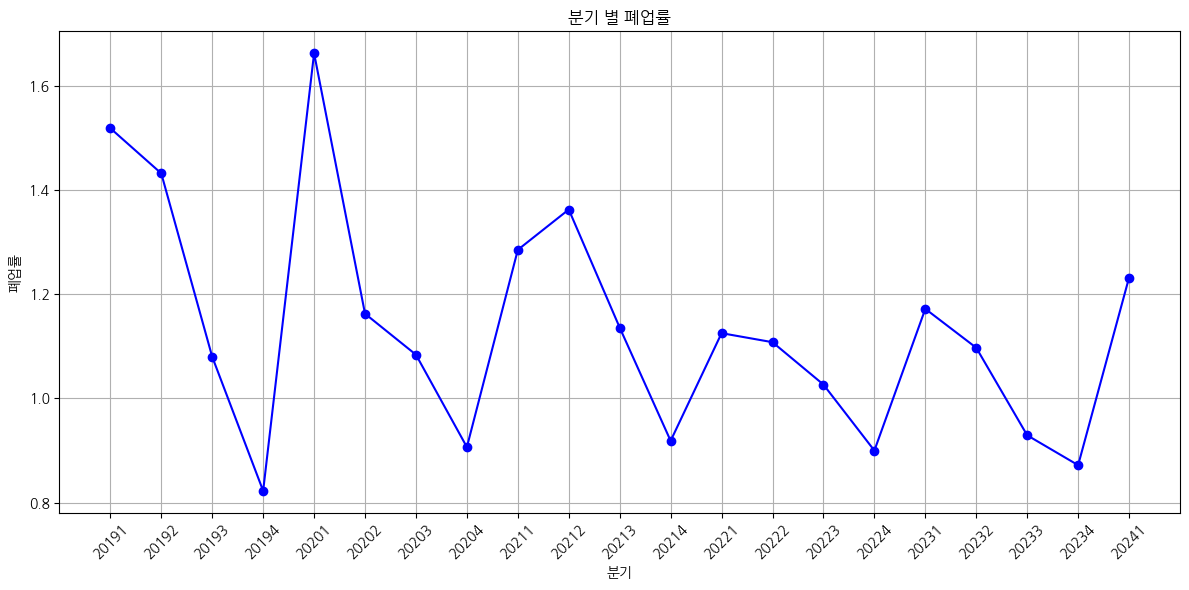

In [13]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(
grouped_results['필수의료']['기준_년분기_코드'].astype(str),
grouped_results['필수의료']['폐업_률'], marker='o', linestyle='-', color='b')
plt.title('분기 별 폐업률')
plt.xlabel('분기')
plt.ylabel('폐업률')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()


계절성이 확실하게 보이는듯?

유독 4분기에 폐업률이 낮다.

#4.전체적인 시도표 확인(분기별 매출 금액)

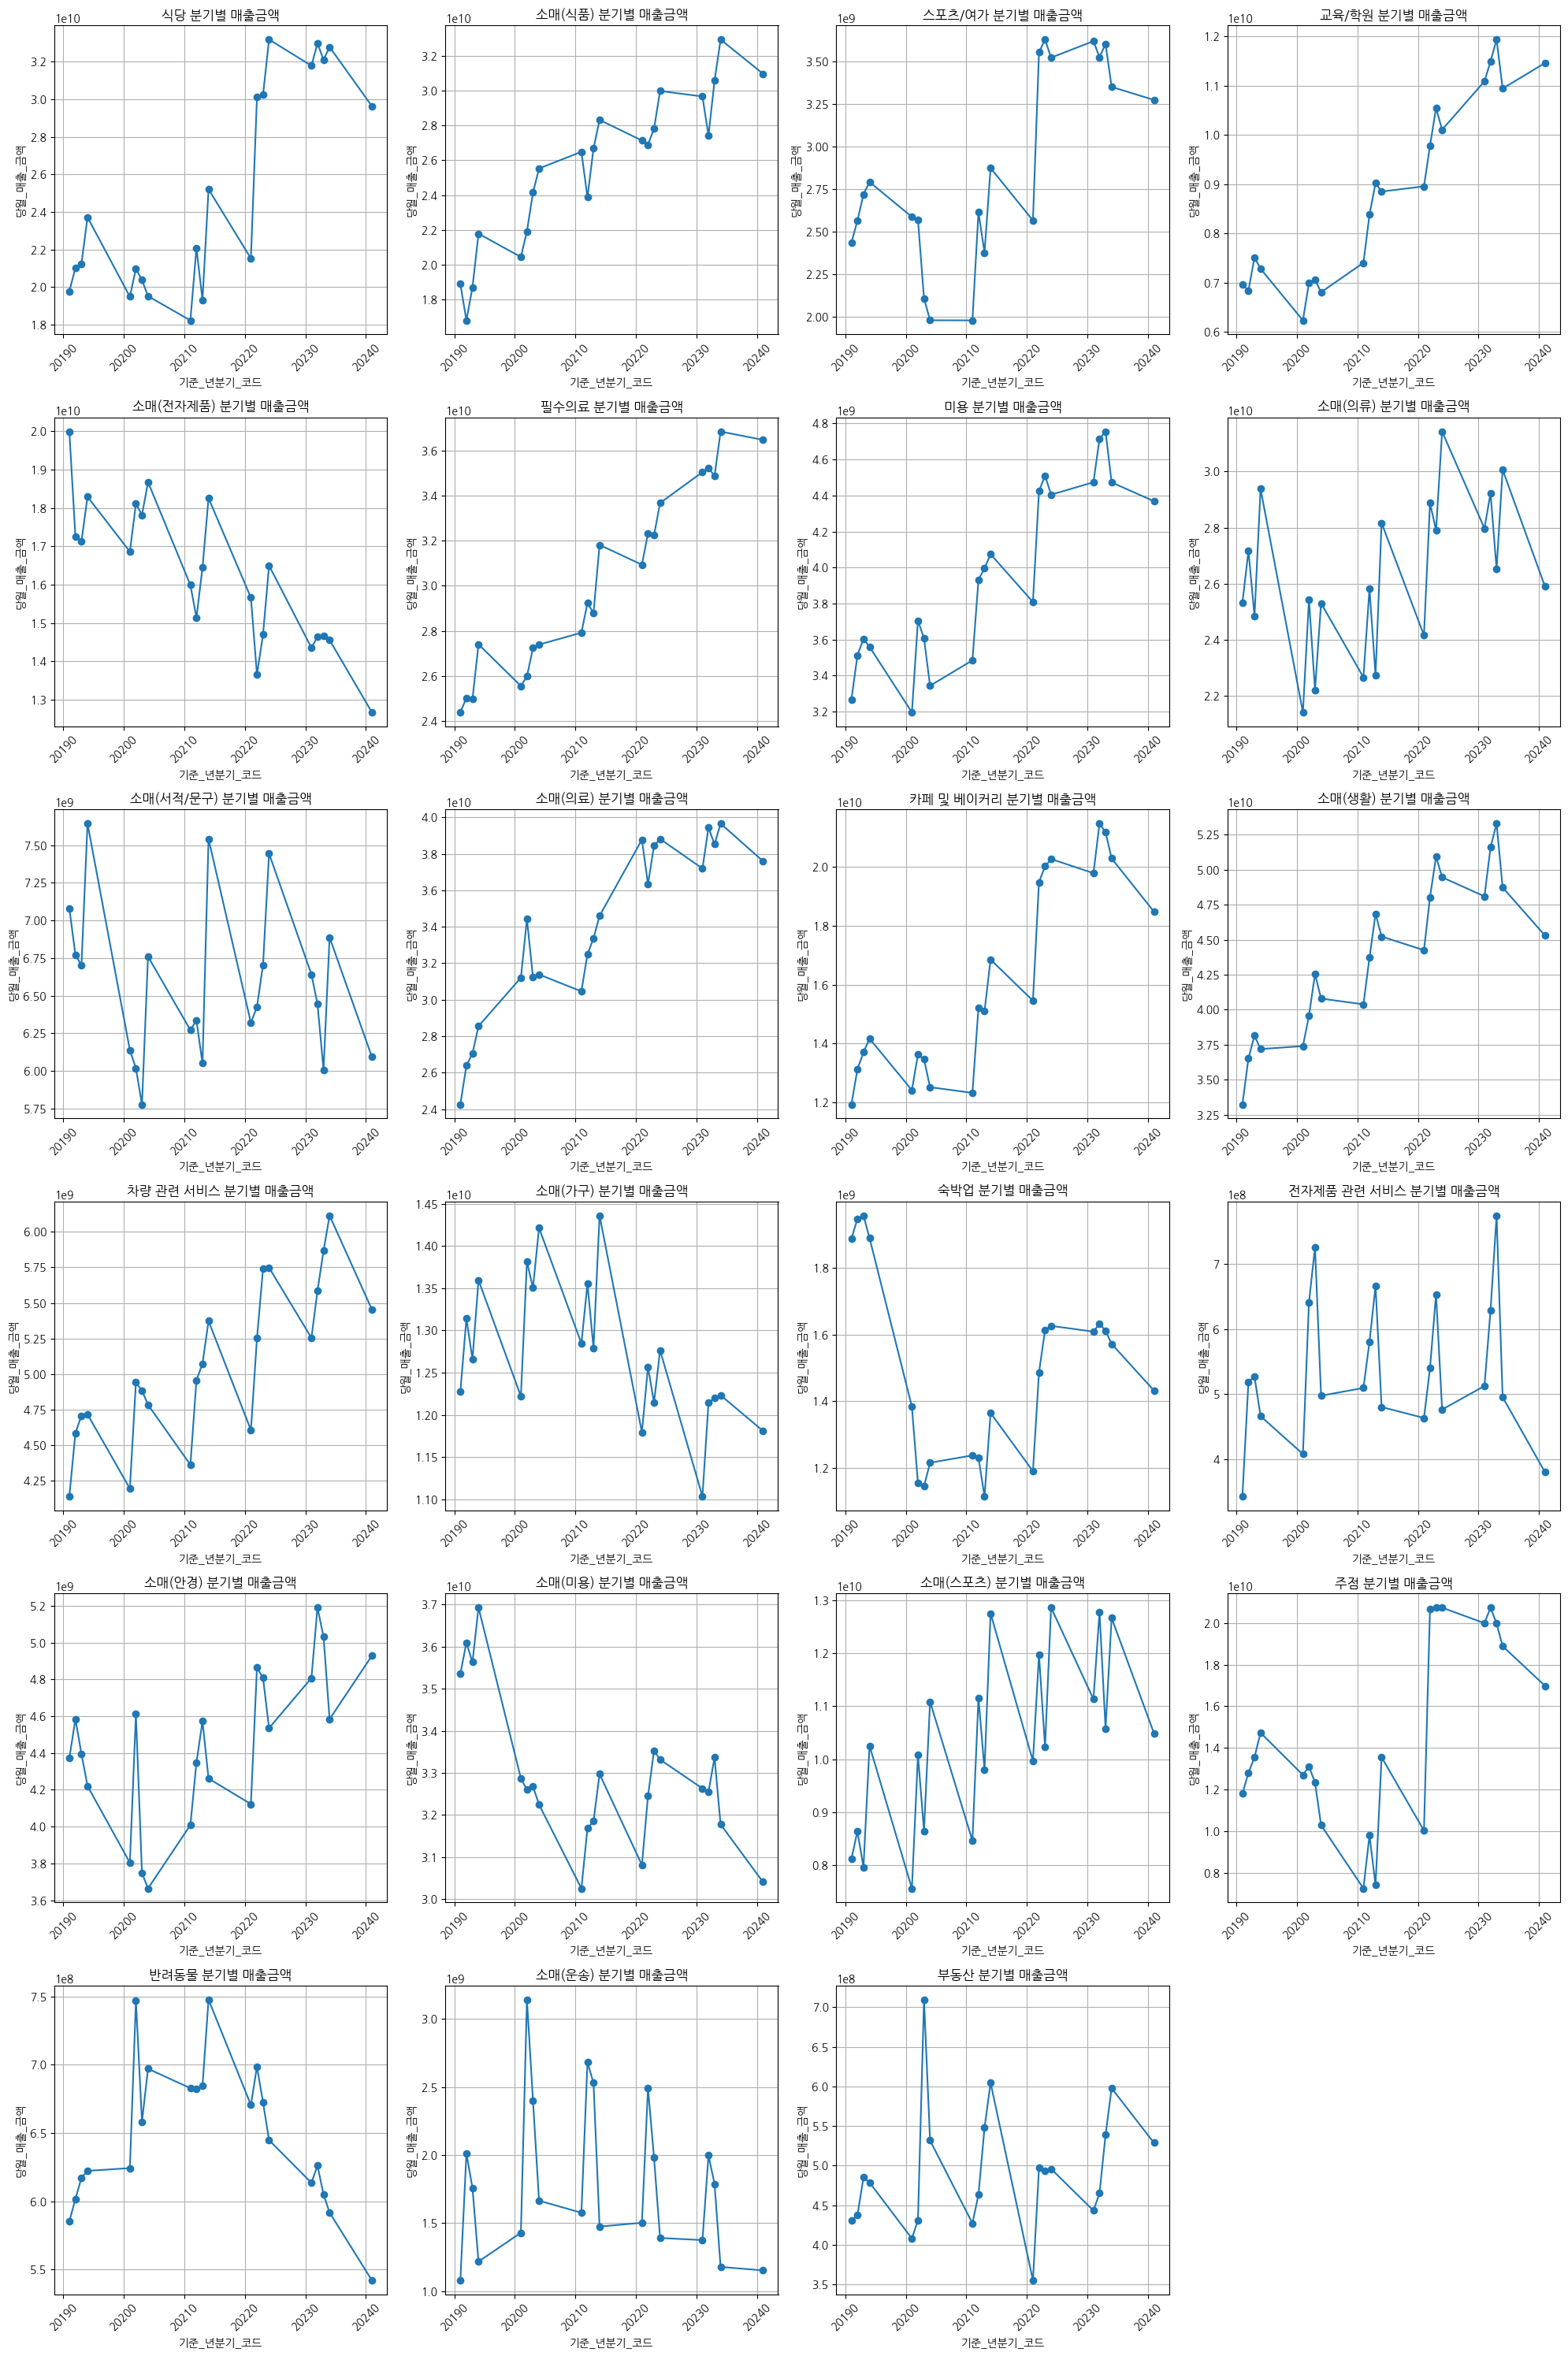

In [15]:
all_quarters = pd.Series([int(f'{year}{quarter}') for year in range(2019, 2025) for quarter in range(1, 5) if not (year == 2024 and quarter > 1)])

# 결과 저장 리스트
results = []

# 각 데이터프레임에 대해 그룹별 평균 계산 및 누락된 분기 채우기
for df, name in dfs:
    p1 = df.groupby('기준_년분기_코드')['당월_매출_금액'].mean().reindex(all_quarters, fill_value=0).reset_index()
    p1.columns = ['기준_년분기_코드', '당월_매출_금액']
    results.append((p1, name))

# y축 범위 결정
all_closure_rates = pd.concat([result[0]['당월_매출_금액'] for result in results])
y_min, y_max = all_closure_rates.min(), all_closure_rates.max()

# 그래프 그리기
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, (result, name) in enumerate(results):
    axes[i].plot(result['기준_년분기_코드'], result['당월_매출_금액'], marker='o')
    axes[i].set_title(f'{name} 분기별 매출금액')
    axes[i].set_xlabel('기준_년분기_코드')
    axes[i].set_ylabel('당월_매출_금액')
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)  # X축 레이블 회전

# 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#5.업종별 자세하게 특징 들여다보기(매출액)

In [16]:
all_quarters = pd.Series([int(f'{year}{quarter}') for year in range(2019, 2025) for quarter in range(1, 5) if not (year == 2024 and quarter > 1)])

# 그룹별 평균 계산 결과 저장할 사전
grouped_results1 = {}

# 각 데이터프레임에 대해 그룹별 평균 계산 및 누락된 분기 채우기
for df, name in dfs:
    p1 = df.groupby('기준_년분기_코드')['당월_매출_금액'].mean().reindex(all_quarters, fill_value=0).reset_index()
    p1.columns = ['기준_년분기_코드', '당월_매출_금액']
    grouped_results1[name] = p1

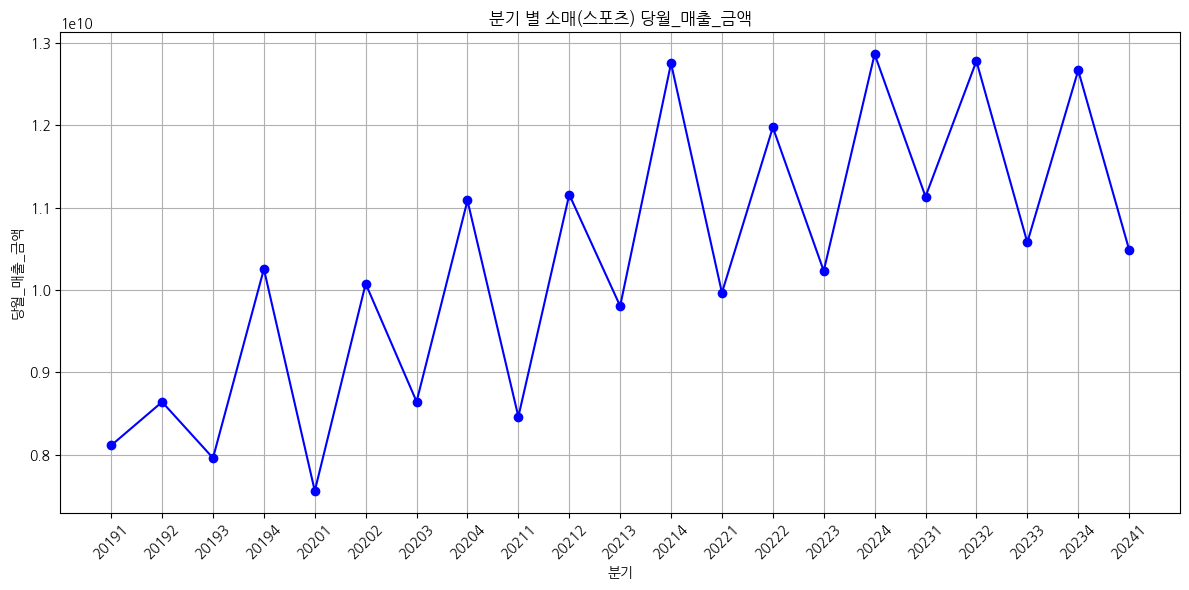

In [32]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(
grouped_results1['소매(스포츠)']['기준_년분기_코드'].astype(str),
grouped_results1['소매(스포츠)']['당월_매출_금액'], marker='o', linestyle='-', color='b')
plt.title('분기 별 소매(스포츠) 당월_매출_금액')
plt.xlabel('분기')
plt.ylabel('당월_매출_금액')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()


#소매(식품)
#소매(생활)
#소매(운송)
#소매(스포츠)
#차량관련서비스
#필수의료



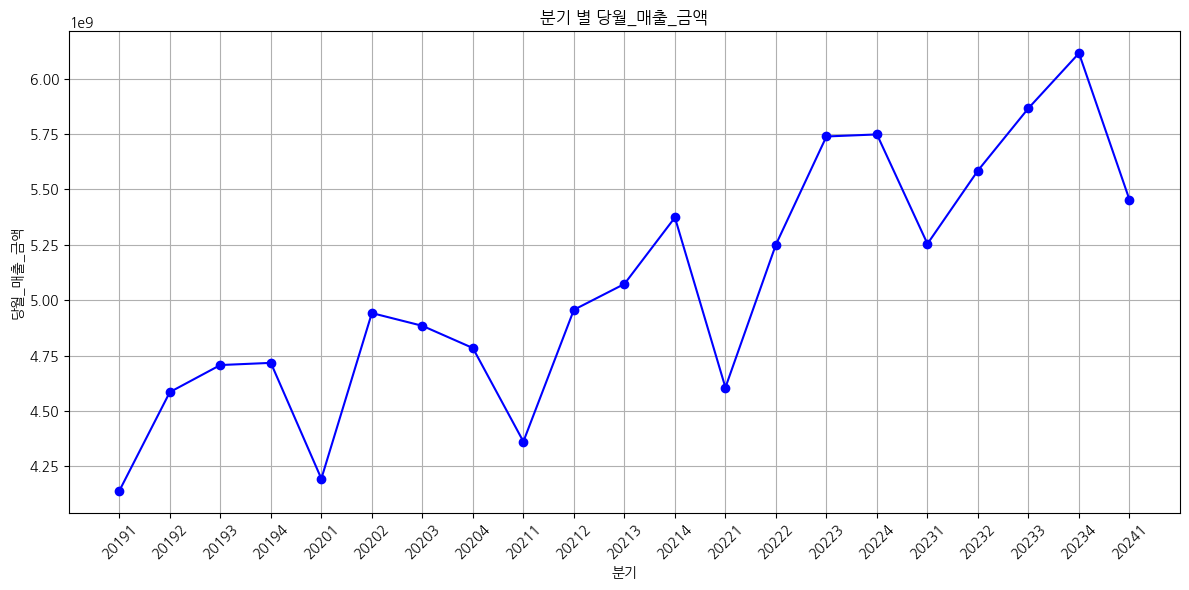

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(
grouped_results1['차량 관련 서비스']['기준_년분기_코드'].astype(str),
grouped_results1['차량 관련 서비스']['당월_매출_금액'], marker='o', linestyle='-', color='b')
plt.title('분기 별 당월_매출_금액')
plt.xlabel('분기')
plt.ylabel('당월_매출_금액')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()


추세성분(장기적인 변화 추세로 상승 경향인 상태)

계절성분(1년 단위로 전년과 동일/유사하게 발생하는 단기 변동요인으로 주기에 따라 순환하며 변하는 특성)

명확하게 보여서

2024년 3분기 4분기에는 1분기보다 매출액이 높아지지 않을까? 예측가능


